In [1]:
import matplotlib.pyplot as plt
import lifa.fames.process_mixing_ratio as em
#from lifa.fames.reports import plot_signal
#import fames_reports as fames
import lifa.fames.reports as reports
from importlib import reload

import glob
import numpy as np

### Lista de arquivos

In [2]:
# Gera lista de arquivos a serem processados. Arquivos precisam estar ordenados
files = sorted(glob.glob(r'.\sample_data\20241204_CEPEMA_FLARE_acima da chama_p=23\a???????.??????'))
#files = sorted(glob.glob(r'd:\FAMES\Medidas\Medidas CEPEMA\20241204-Alex e Jairo\Meio chama p=23mm bom pra caralho\a???????.??????'))
#files = sorted(glob.glob(r'd:\FAMES\Medidas\Medidas CEPEMA\20241204-Alex e Jairo\Topo chama p-23mm\a???????.??????'))
#files = sorted(glob.glob(r'c:\Users\jairo\Documents\Medidas FAMES\Mikhail\medidas-Mikhail\20240904\20240904\pinhoe26.469 full ap top the fire\a???????.??????'))
#files = sorted(glob.glob(r'c:\Users\jairo\Documents\Medidas FAMES\Mikhail\medidas-Mikhail\20240904\20240904\pinhole26.465 full ap top the fire\a???????.??????'))
files

['.\\sample_data\\20241204_CEPEMA_FLARE_acima da chama_p=23\\a24C0505.552826',
 '.\\sample_data\\20241204_CEPEMA_FLARE_acima da chama_p=23\\a24C0505.560971',
 '.\\sample_data\\20241204_CEPEMA_FLARE_acima da chama_p=23\\a24C0505.565115',
 '.\\sample_data\\20241204_CEPEMA_FLARE_acima da chama_p=23\\a24C0505.573260',
 '.\\sample_data\\20241204_CEPEMA_FLARE_acima da chama_p=23\\a24C0505.581404',
 '.\\sample_data\\20241204_CEPEMA_FLARE_acima da chama_p=23\\a24C0505.585549',
 '.\\sample_data\\20241204_CEPEMA_FLARE_acima da chama_p=23\\a24C0505.593694',
 '.\\sample_data\\20241204_CEPEMA_FLARE_acima da chama_p=23\\a24C0506.001838',
 '.\\sample_data\\20241204_CEPEMA_FLARE_acima da chama_p=23\\a24C0506.005984',
 '.\\sample_data\\20241204_CEPEMA_FLARE_acima da chama_p=23\\a24C0506.014128',
 '.\\sample_data\\20241204_CEPEMA_FLARE_acima da chama_p=23\\a24C0506.022272',
 '.\\sample_data\\20241204_CEPEMA_FLARE_acima da chama_p=23\\a24C0506.030417',
 '.\\sample_data\\20241204_CEPEMA_FLARE_acima da cha

### Configuração de processamento

In [ ]:
# Configuração do processamento
config = {
    'zenith_angle': 12,         # angulo com o horizonte do feixe laser
    'elevation': 0,             # altitude
    'cross_talk_355_353': 160,  # fator de cross talk entre 355 e 353
    'ch4_cal': 4000,            # calibracao CH4
    'co2_cal': 26000,           # calibracao co2
    'ce_cal': 0.25,             # calibracao ce mixing ratio
    'fluo_cal': 100,            # calibracao fluorescencia
    'dead_time': 1/240,         # correcao deadtime em ns
    'background_min_idx': 4000, #index min para regiao de background ~12000
    'background_max_idx' : 4900, #index max para regiao considerada background ~15000
    'z_min_flare': 100,         # distancia minima do sinal em metros
    'z_max_flare': 700,         # distancia maxima do sinal em metros
    'n2_raman': {'channel':'00353.o_an', 'bin_shift':0, 'lambda': 323},     # canal de referencia N2 raman
    'rayleigh': {'channel':'00355.o_an', 'bin_shift':0, 'lambda': 355},     # canal espalhamento laser
    'co2_raman': {'channel':'00371.o_ph', 'bin_shift':3, 'lambda': 371},    # canal de raman co2
    'ch4_raman_s': {'channel':'00395.s_ph', 'bin_shift':3, 'lambda': 395},  # canal de raman ch4 polarizacao s
    'ch4_raman_p': {'channel':'00395.p_ph', 'bin_shift':3, 'lambda': 395},  # canal raman ch4 polarizacao p
    'fluorescence': {'channel':'00460.o_an', 'bin_shift':1, 'lambda': 460}, # canal de fluorescencia
    'n2_raman_b': {'channel':'00530.o_an', 'bin_shift':0, 'lambda': 530},   # canal raman N2 para 532 nm
    'rayleigh_b': {'channel':'00532.o_an', 'bin_shift':0, 'lambda': 532},   # canal espalhamento em 532 nm 
}

### Processamento

In [ ]:
# Junta arquivos em grupos e processa. Saida é um Dataframe pandas
step = 1    # Passo para grupos de média
size = 5    # Numero de arquivos sequencias para media
reload(em)
output = em.emissions_group(files, config=config, step=step, size=size)
output

,start_time,stop_time,duration,bin_width,cross_talk_355_353,ch4_cal,co2_cal,ce_cal,fluo_cal,z_trace,...,n2_raman_trace,rayleigh_trace,co2_raman_trace,ch4_raman_s_trace,ch4_raman_p_trace,fluorescence_trace,rayleigh_b_trace,n2_raman_b_trace,number_of_files,files
0,2024-12-05 05:54:47+00:00,2024-12-05 05:58:14+00:00,0 days 00:03:27,3.75,160,4000,26000,0.25,100,"[99.375, 103.125, 106.875, 110.625, 114.375, 1...",...,"[6.666190713426507, 8.10333157292763, 9.479868...","[131.22534772636038, 153.87975521880105, 175.0...","[0.07615295837078148, 0.1054863527910719, 0.13...","[0.005204500109526195, 0.0012962145449048408, ...","[0.003853941468443697, 0.02144251538401419, 0....","[0.019622232569666664, 0.015973708745856463, 0...","[42.48073277147781, 50.048768199244215, 57.016...","[2.110036029405708, 2.549401935420941, 2.96971...",5,[.\sample_data\20241204_CEPEMA_FLARE_acima da ...
1,2024-12-05 05:55:28+00:00,2024-12-05 05:58:55+00:00,0 days 00:03:27,3.75,160,4000,26000,0.25,100,"[99.375, 103.125, 106.875, 110.625, 114.375, 1...",...,"[6.686686843131585, 8.123485800281427, 9.50131...","[131.43045239098822, 154.4495572156606, 176.28...","[0.07223586694577443, 0.11330328827346046, 0.1...","[0.0051589044522810275, 0.0012506188876596732,...","[0.005816785028527844, 0.017542405488288698, 0...","[0.019246480708446256, 0.015750323473580963, 0...","[42.22138365063514, 49.87234183633073, 57.0277...","[2.106911233512103, 2.5467980483940416, 2.9668...",5,[.\sample_data\20241204_CEPEMA_FLARE_acima da ...
2,2024-12-05 05:56:10+00:00,2024-12-05 05:59:36+00:00,0 days 00:03:26,3.75,160,4000,26000,0.25,100,"[99.375, 103.125, 106.875, 110.625, 114.375, 1...",...,"[6.637174485487158, 8.072321028750308, 9.45078...","[129.68318575470457, 152.53099780887717, 174.4...","[0.06637458167080232, 0.12895605866392784, 0.1...","[0.005189301663184842, 0.001281016098563487, 0...","[0.009729540352121518, 0.01363808050330209, 0....","[0.016599518894793164, 0.014165007922032125, 0...","[41.26350583643921, 48.76405158687429, 55.6945...","[2.095488628059254, 2.534401459648068, 2.95385...",5,[.\sample_data\20241204_CEPEMA_FLARE_acima da ...
3,2024-12-05 05:56:51+00:00,2024-12-05 06:00:18+00:00,0 days 00:03:27,3.75,160,4000,26000,0.25,100,"[99.375, 103.125, 106.875, 110.625, 114.375, 1...",...,"[6.620199840424138, 8.055467668032524, 9.43672...","[126.91776510607241, 149.31797086060217, 171.4...","[0.0761659857064744, 0.14266530489127277, 0.12...","[0.0032720535835625954, 0.001317926712134544, ...","[0.007775318013065777, 0.011683794515274496, 0...","[0.012814885142316434, 0.012811083431926384, 0...","[39.574212825321794, 46.65709969063229, 53.458...","[2.085691019897477, 2.5268981464346867, 2.9469...",5,[.\sample_data\20241204_CEPEMA_FLARE_acima da ...
4,2024-12-05 05:57:33+00:00,2024-12-05 06:00:59+00:00,0 days 00:03:26,3.75,160,4000,26000,0.25,100,"[99.375, 103.125, 106.875, 110.625, 114.375, 1...",...,"[6.588806876155031, 8.020827129934855, 9.39249...","[124.13575353612595, 146.63008963989978, 168.7...","[0.08203860484687917, 0.1426718185414409, 0.12...","[0.0033263344259119422, 0.0013722075544838907,...","[0.015594569533704417, 0.017548919173813484, 0...","[0.011644510625679061, 0.013406789749566883, 0...","[37.99260906832747, 45.08093834296224, 51.8050...","[2.0736655006141715, 2.513201812706865, 2.9397...",5,[.\sample_data\20241204_CEPEMA_FLARE_acima da ...
5,2024-12-05 05:58:14+00:00,2024-12-05 06:01:41+00:00,0 days 00:03:27,3.75,160,4000,26000,0.25,100,"[99.375, 103.125, 106.875, 110.625, 114.375, 1...",...,"[6.543962598628244, 7.974743119774904, 9.33769...","[120.52039684671563, 142.41467731879413, 164.4...","[0.08594732988673616, 0.1387569029013402, 0.13...","[0.001417803494584876, 0.001417803494584876, 0...","[0.015605425617317974, 0.01755977525742704, 0....","[0.011157529663663013, 0.01313583538968377, 0....","[36.05555511823462, 42.7146433361415, 49.25151...","[2.0610271343517548, 2.5002681802708597, 2.927...",5,[.\sample_data\20241204_CEPEMA_FLARE_acima da ...
6

### Apresentação

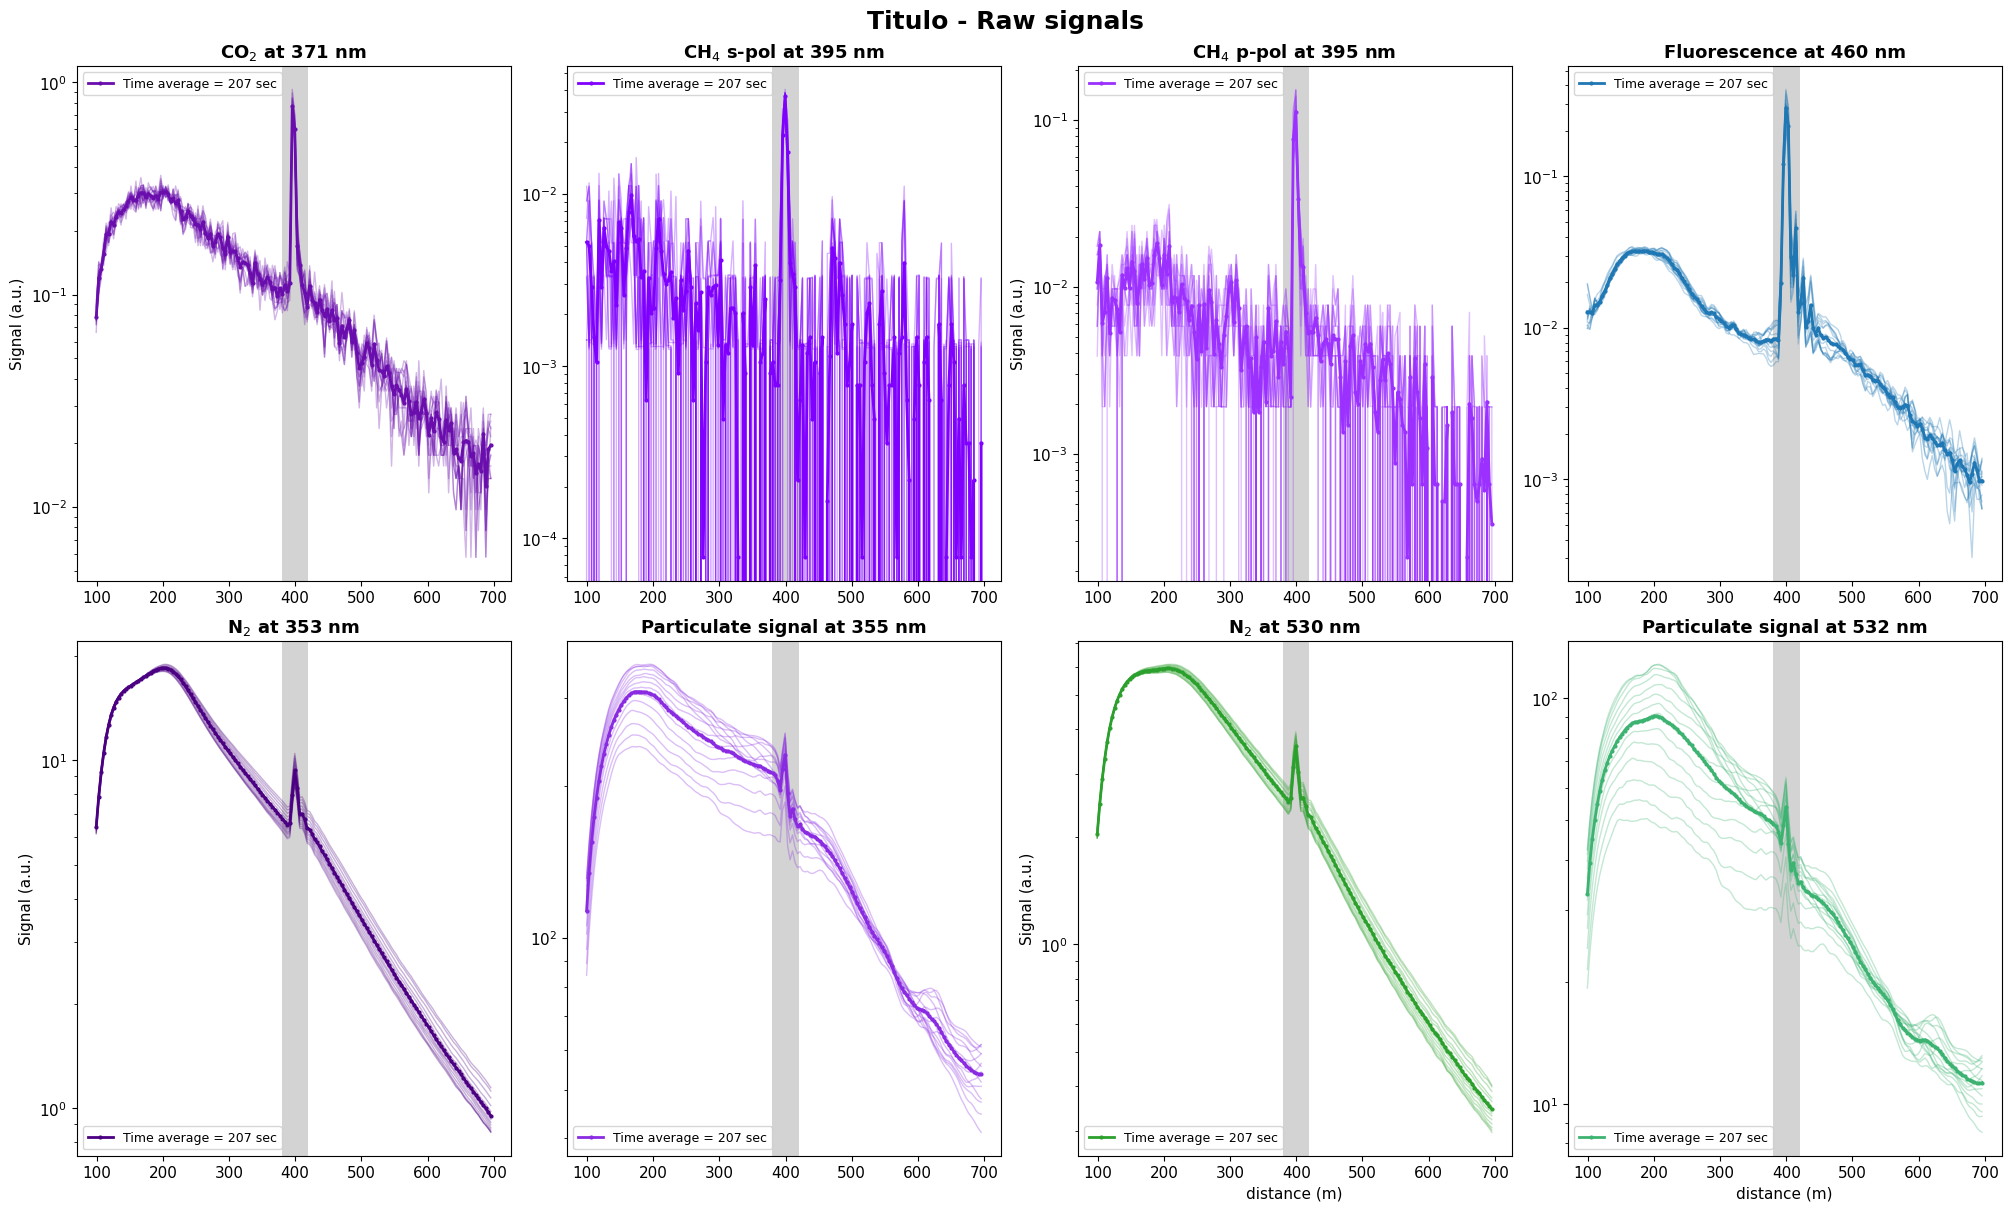

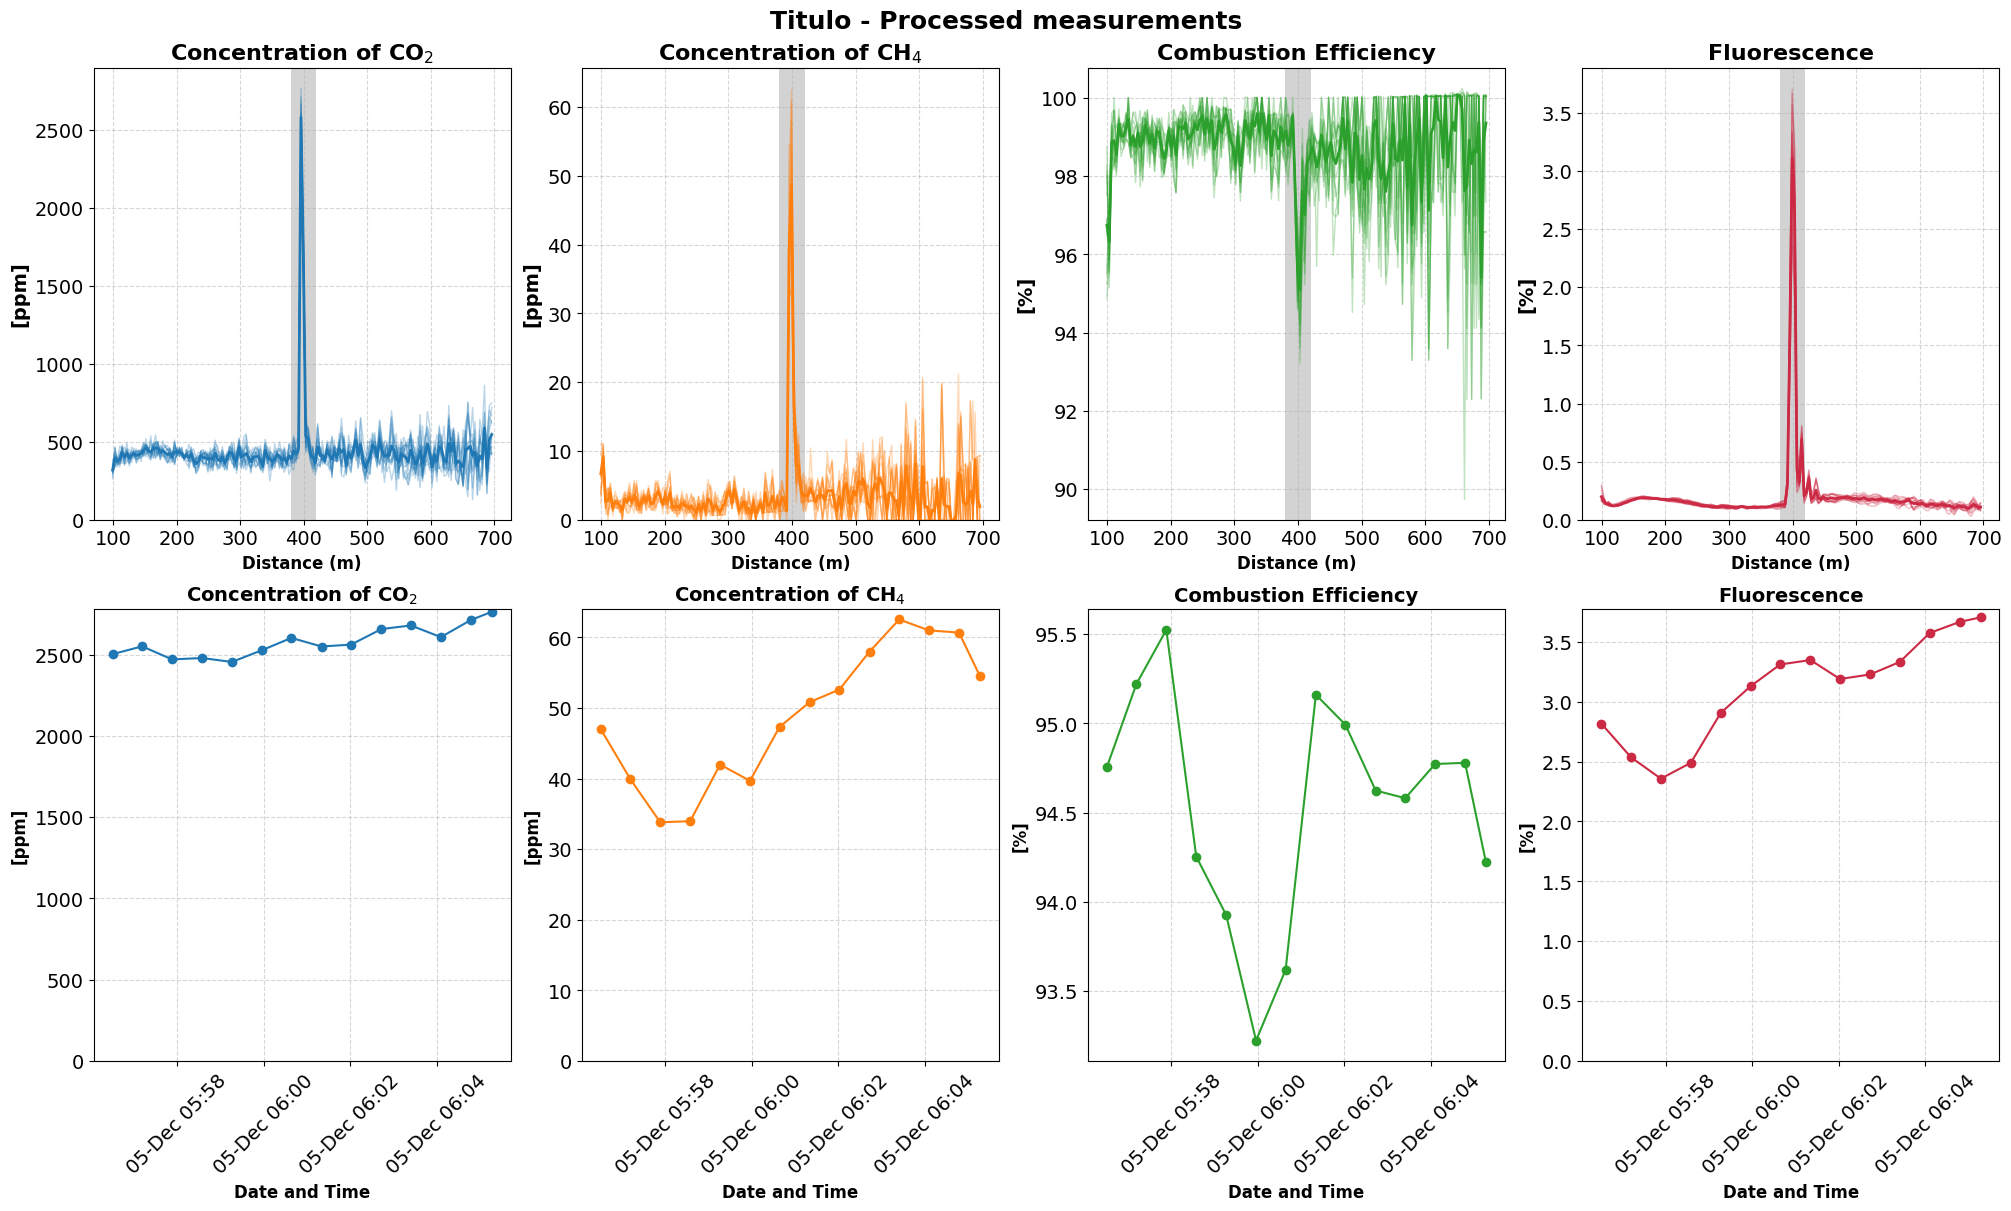

In [ ]:

reload(reports)

# Titulo no graficos
title = "Titulo"
# filtra dados se necessário antes de plotas
filtered = output

min_z = 380
max_z = 420
fig = reports.plot_signals(filtered, min_z, max_z, title + " - Raw signals")
plt.show()
fig_mix = reports.plot_emissions(filtered, min_z, max_z, title + " - Processed measurements")
plt.show()
